In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import scikitplot as skplt

import sklearn.preprocessing as preprocessing
import seaborn as sns

In [44]:
titanic_data = pd.read_csv('input/titanic/train.csv')
test_data = pd.read_csv('input/titanic/test.csv')

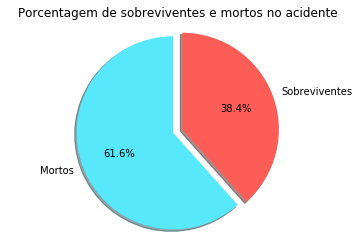

In [45]:
# Taxa de sobreviventes e mortos no desastre
labels = ['Mortos', 'Sobreviventes']
val_counts = titanic_data.Survived.value_counts()

sizes = [val_counts[0], val_counts[1]]
colors = ['#57e8fc', '#fc5e57']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1,0), autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.title('Porcentagem de sobreviventes e mortos no acidente')
plt.show()

In [46]:
# Tratamentos dados ao dataset:
# 1 - Retirada das colunas PassengerId, Cabin, Ticket e Fare
# 2 - Transformar features Sex e Embarked em features numéricas, mantendo a sua categorização
# 3 - Criação de uma feature chamada isAlone, aonde a mesma é uma feature extraída das colunas SibSp and Parch
# 4 - Completar os valores faltantes em Age e Fare com a média

In [47]:
full_data = [titanic_data, test_data]

for dataset in full_data:
    # 1
    dataset.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1, inplace = True)
    # 2
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Embarked'].fillna(titanic_data['Embarked'].dropna().mode()[0], inplace = True)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    # 3
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
    # 4
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [48]:
y_values = titanic_data['Survived'].values
titanic_data.drop(['Survived'], axis=1, inplace=True)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(titanic_data, y_values, test_size=0.2, stratify=y_values, random_state=32)

In [100]:
# Considerando os sets de treino e teste criados anteriormente (x_train, x_test, y_train, y_test),
# escolha e treine 3 dos modelos apresentados na aula, cujos nomes estão na lista names.
# 1 - Regressão Logística
# 2 - SVM
# 3 - KNN
# 4 - Rede Neural Multi-Camada (MLP)
# 5 - Árvores de Decisão
# 6 - Random Forest
# Lembrando que é necessário que algums parâmetros sejam tratados na hora da escolha do modelo, então
# não se esqueçam de checar a documentação do scikit-learn.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = [LogisticRegression(), SVC(), KNeighborsClassifier(), LogisticRegression(), SVC(), KNeighborsClassifier()]
names = ['Regressão Logística', 'SVM', 'KNN','Rede neural', 'Árvores de Decisão', 'Random Forest']

In [102]:
def executa_modelo(models, names):
    for modelo in models:
        print("-----------", names, "----------- \n")
        instancia_modelo = modelo
        instancia_modelo.fit(x_train, y_train)
        
        print('\nScore Train:', instancia_modelo.score(x_train, y_train))
        print('\nScore Test:', instancia_modelo.score(x_test, y_test))
        print('\nMatriz de Confusão:\n', confusion_matrix(y_test, instancia_modelo.predict(x_test)))
        print('\nMétricas de Classificação', classification_report(y_test, instancia_modelo.predict(x_test))) 

executa_modelo(models, names)

----------- ['Regressão Logística', 'SVM', 'KNN', 'Rede neural', 'Árvores de Decisão', 'Random Forest'] ----------- 


Score Train: 0.8061797752808989

Score Test: 0.7541899441340782

Matriz de Confusão:
 [[94 16]
 [28 41]]

Métricas de Classificação              precision    recall  f1-score   support

          0       0.77      0.85      0.81       110
          1       0.72      0.59      0.65        69

avg / total       0.75      0.75      0.75       179

----------- ['Regressão Logística', 'SVM', 'KNN', 'Rede neural', 'Árvores de Decisão', 'Random Forest'] ----------- 


Score Train: 0.9087078651685393

Score Test: 0.7094972067039106

Matriz de Confusão:
 [[89 21]
 [31 38]]

Métricas de Classificação              precision    recall  f1-score   support

          0       0.74      0.81      0.77       110
          1       0.64      0.55      0.59        69

avg / total       0.70      0.71      0.70       179

----------- ['Regressão Logística', 'SVM', 'KNN', 'Rede neural', 'Ár

In [83]:
#Regressão Logistiva
rl = LogisticRegression()
rl.fit(x_train, y_train)
print('Score Train:', rl.score(x_train, y_train))
print('Score Test:', rl.score(x_test, y_test))
print('Matriz de Confusão:', confusion_matrix(y_test, rl.predict(x_test)))
print('Métricas de Classificação', classification_report(y_test, rl.predict(x_test)))

Score Train: 0.8061797752808989
Score Test: 0.7541899441340782
Matriz de Confusão: [[94 16]
 [28 41]]
Métricas de Classificação              precision    recall  f1-score   support

          0       0.77      0.85      0.81       110
          1       0.72      0.59      0.65        69

avg / total       0.75      0.75      0.75       179



In [11]:
#SVM
svclassifier = SVC(kernel='rbf', probability=True)
svclassifier.fit(x_train, y_train)
print('Score Train:', svclassifier.score(x_train, y_train))
print('Score Test:', svclassifier.score(x_test, y_test))
print('Matriz de Confusão:', confusion_matrix(y_test, svclassifier.predict(x_test)))
print(classification_report(y_test, svclassifier.predict(x_test)))

Score Train: 0.9087078651685393
Score Test: 0.7094972067039106
Matriz de Confusão: [[89 21]
 [31 38]]
             precision    recall  f1-score   support

          0       0.74      0.81      0.77       110
          1       0.64      0.55      0.59        69

avg / total       0.70      0.71      0.70       179



In [12]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
print('Score Train:', knn.score(x_train, y_train))
print('Score Test:', knn.score(x_test, y_test))
print('Matriz de Confusão:', confusion_matrix(y_test, knn.predict(x_test)))
print('Métricas de Classificação', classification_report(y_test, knn.predict(x_test)))

Score Train: 0.8019662921348315
Score Test: 0.7206703910614525
Matriz de Confusão: [[93 17]
 [33 36]]
Métricas de Classificação              precision    recall  f1-score   support

          0       0.74      0.85      0.79       110
          1       0.68      0.52      0.59        69

avg / total       0.72      0.72      0.71       179



In [13]:
# Considerando os modelos treinados no exercício anterior, re-treine os modelos utilizando o método de 
# validação cruzada (cross_validation no pacote scikit-learn), e compare a acurácia de ambas as situações
# (sem a utilização de validação cruzada e com a utilização de validação cruzada).
#
# Além disso, deve ser apresentada a métrica de log-loss do modelo, a sua respectiva matriz de confusão
# (confusion_matrix no pacote do scikit-learn) e a apresentação da curva ROC do modelo (dica: utilize o pacote
# scikitplot)
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss

Regressão Logistica - Fold = 5
{'fit_time': array([0.00582218, 0.00394297, 0.00441217, 0.00242972, 0.00241518]), 'score_time': array([0.00350404, 0.00256181, 0.00452256, 0.00187755, 0.00243044]), 'test_neg_log_loss': array([-0.47555844, -0.47117016, -0.45220123, -0.46647869, -0.43263626]), 'train_neg_log_loss': array([-0.44551883, -0.44433844, -0.45039602, -0.44751861, -0.45513108]), 'test_accuracy': array([0.77653631, 0.78212291, 0.78089888, 0.7752809 , 0.79661017]), 'train_accuracy': array([0.79213483, 0.78792135, 0.79242637, 0.80504909, 0.79131653]), 'test_precision': array([0.71641791, 0.71428571, 0.71014493, 0.75      , 0.75      ]), 'train_precision': array([0.74900398, 0.72262774, 0.74609375, 0.75862069, 0.74319066]), 'test_recall': array([0.69565217, 0.72463768, 0.72058824, 0.61764706, 0.70588235]), 'train_recall': array([0.68864469, 0.72527473, 0.69708029, 0.72262774, 0.69708029])}
Matriz de confusão:
[[94 16]
 [28 41]]


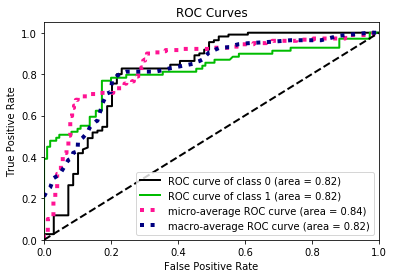

In [14]:
#Regressão Logistiva
scores_RL = cross_validate(rl, titanic_data, y_values, cv=5, scoring=['neg_log_loss', 'accuracy', 'precision', 'recall'])
print('Regressão Logistica - Fold = 5')
print(scores_RL)
print('Matriz de confusão:')
print(confusion_matrix(y_test, rl.predict(x_test)))
# Plot ROC
skplt.metrics.plot_roc(y_test, rl.predict_proba(x_test))

SVN - Fold = 5
{'fit_time': array([0.10903716, 0.08309889, 0.08434916, 0.08359528, 0.08486056]), 'score_time': array([0.01363826, 0.01342416, 0.01384807, 0.01353574, 0.01370835]), 'test_neg_log_loss': array([-0.68844061, -0.61995051, -0.57020247, -0.5351838 , -0.54655056]), 'train_neg_log_loss': array([-0.31340817, -0.35026846, -0.36420935, -0.38008048, -0.37745479]), 'test_accuracy': array([0.63687151, 0.62569832, 0.7247191 , 0.73595506, 0.74011299]), 'train_accuracy': array([0.90168539, 0.89606742, 0.90322581, 0.89761571, 0.89215686]), 'test_precision': array([0.53333333, 0.52173913, 0.69387755, 0.75609756, 0.68965517]), 'train_precision': array([0.93939394, 0.91286307, 0.91497976, 0.93133047, 0.930131  ]), 'test_recall': array([0.46376812, 0.34782609, 0.5       , 0.45588235, 0.58823529]), 'train_recall': array([0.79487179, 0.80586081, 0.82481752, 0.7919708 , 0.77737226])}
Matriz de confusão:
[[89 21]
 [31 38]]


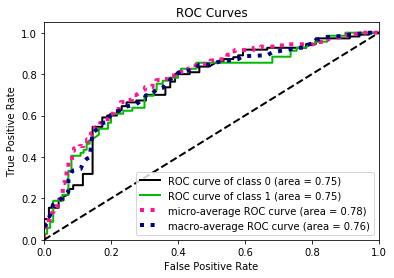

In [18]:
#SVN
scores_sv = cross_validate(svclassifier, titanic_data, y_values, cv=5, scoring=['neg_log_loss', 'accuracy', 'precision', 'recall'])
print('SVN - Fold = 5')
print(scores_sv)
print('Matriz de confusão:')
print(confusion_matrix(y_test, svclassifier.predict(x_test)))
skplt.metrics.plot_roc(y_test, svclassifier.predict_proba(x_test))

KNN - Fold = 5
{'fit_time': array([0.00210452, 0.00128174, 0.00190043, 0.00182796, 0.00110364]), 'score_time': array([0.00799251, 0.00516677, 0.00718975, 0.00503159, 0.00453711]), 'test_neg_log_loss': array([-3.23457245, -2.39194015, -2.94707925, -2.01455448, -1.25379979]), 'train_neg_log_loss': array([-0.38811653, -0.4022623 , -0.41698605, -0.420602  , -0.46618915]), 'test_accuracy': array([0.62569832, 0.68156425, 0.68539326, 0.69662921, 0.71186441]), 'train_accuracy': array([0.80758427, 0.79494382, 0.79382889, 0.77559607, 0.78851541]), 'test_precision': array([0.51724138, 0.59090909, 0.60344828, 0.62962963, 0.6440678 ]), 'train_precision': array([0.79059829, 0.75708502, 0.74901961, 0.7394958 , 0.77092511]), 'test_recall': array([0.43478261, 0.56521739, 0.51470588, 0.5       , 0.55882353]), 'train_recall': array([0.67765568, 0.68498168, 0.69708029, 0.64233577, 0.63868613])}
Matriz de confusão:
[[93 17]
 [33 36]]


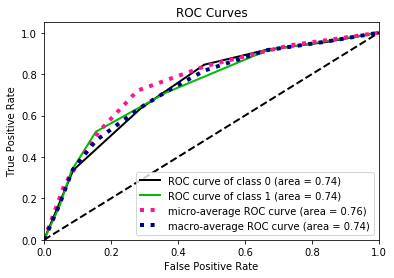

In [17]:
#KNN
scores_knn = cross_validate(knn, titanic_data, y_values, cv=5, scoring=['neg_log_loss', 'accuracy', 'precision', 'recall'])
print('KNN - Fold = 5')
print(scores_knn)
print('Matriz de confusão:')
print(confusion_matrix(y_test, knn.predict(x_test)))
skplt.metrics.plot_roc(y_test, knn.predict_proba(x_test))